# Exploratory Data Analysis: Electronics Ratings Dataset

This notebook performs EDA on the Amazon Electronics ratings dataset for building recommendation systems.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

## 1. Load and Inspect Data

In [2]:
# Load the dataset
df = pd.read_csv('ratings_Electronics.csv', 
                 names=['user_id', 'product_id', 'rating', 'timestamp'],
                 header=None)

print(f"Dataset Shape: {df.shape}")
print(f"Total Ratings: {len(df):,}")
df.head(10)

Dataset Shape: (7824482, 4)
Total Ratings: 7,824,482


,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.00,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.00,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.00,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.00,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.00,1334707200
5,A1QGNMC6O1VW39,0511189877,5.00,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.00,1397433600
7,A2TY0BTJOTENPG,0511189877,5.00,1395878400
8,A34ATBPOK6HCHY,0511189877,5.00,1395532800
9,A89DO69P0XZ27,0511189877,5.00,1395446400


In [3]:
# Basic info
print("=" * 50)
print("DATA TYPES")
print("=" * 50)
print(df.dtypes)
print("\n")
print("=" * 50)
print("MEMORY USAGE")
print("=" * 50)
print(f"Total Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

DATA TYPES
user_id        object
product_id     object
rating        float64
timestamp       int64
dtype: object


MEMORY USAGE
Total Memory: 1147.22 MB


In [4]:
# Check for missing values
print("=" * 50)
print("MISSING VALUES")
print("=" * 50)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
print(missing_df)

MISSING VALUES
            Missing Count  Percentage
user_id                 0        0.00
product_id              0        0.00
rating                  0        0.00
timestamp               0        0.00


In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates:,} ({duplicates/len(df)*100:.2f}%)")


Duplicate Rows: 0 (0.00%)


## 2. Basic Statistics

In [6]:
# Key statistics
n_users = df['user_id'].nunique()
n_products = df['product_id'].nunique()
n_ratings = len(df)

print("=" * 50)
print("KEY STATISTICS")
print("=" * 50)
print(f"Number of Unique Users: {n_users:,}")
print(f"Number of Unique Products: {n_products:,}")
print(f"Total Ratings: {n_ratings:,}")
print(f"\nAverage Ratings per User: {n_ratings/n_users:.2f}")
print(f"Average Ratings per Product: {n_ratings/n_products:.2f}")
print(f"\nRating Matrix Density: {(n_ratings / (n_users * n_products)) * 100:.6f}%")
print(f"Sparsity: {(1 - n_ratings / (n_users * n_products)) * 100:.6f}%")

KEY STATISTICS
Number of Unique Users: 4,201,696
Number of Unique Products: 476,002
Total Ratings: 7,824,482

Average Ratings per User: 1.86
Average Ratings per Product: 16.44

Rating Matrix Density: 0.000391%
Sparsity: 99.999609%


In [7]:
# Rating statistics
print("\n" + "=" * 50)
print("RATING STATISTICS")
print("=" * 50)
print(df['rating'].describe())


RATING STATISTICS
count   7824482.00
mean          4.01
std           1.38
min           1.00
25%           3.00
50%           5.00
75%           5.00
max           5.00
Name: rating, dtype: float64


## 3. Rating Distribution Analysis

In [8]:
# Rating value counts
rating_counts = df['rating'].value_counts().sort_index()
rating_pct = (rating_counts / len(df) * 100).round(2)

print("Rating Distribution:")
for rating, count in rating_counts.items():
    print(f"  Rating {rating}: {count:,} ({rating_pct[rating]:.2f}%)")

Rating Distribution:
  Rating 1.0: 901,765 (11.52%)
  Rating 2.0: 456,322 (5.83%)
  Rating 3.0: 633,073 (8.09%)
  Rating 4.0: 1,485,781 (18.99%)
  Rating 5.0: 4,347,541 (55.56%)


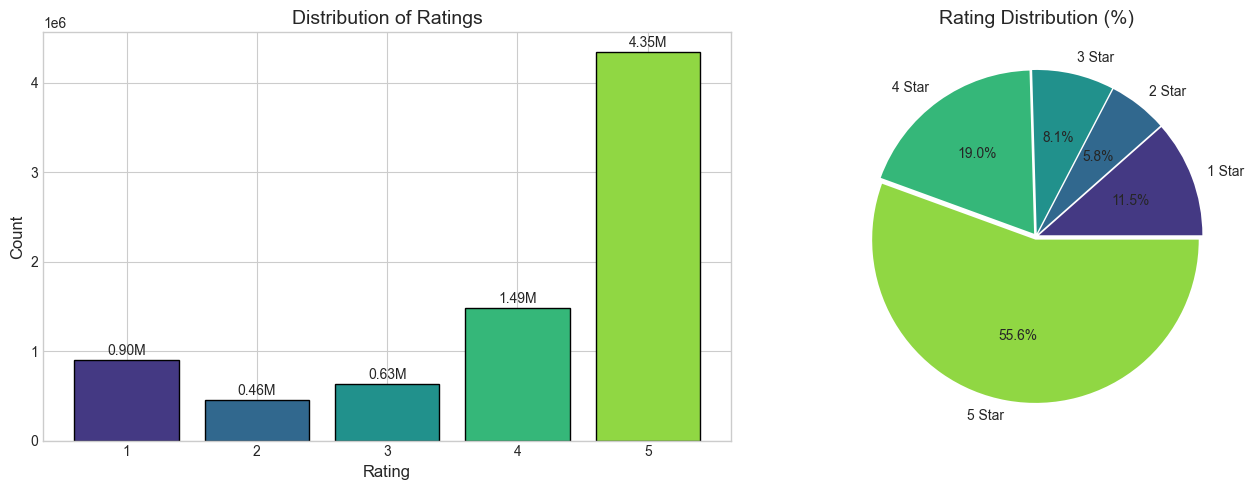

In [9]:
# Visualize rating distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
colors = sns.color_palette('viridis', 5)
axes[0].bar(rating_counts.index, rating_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Rating', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of Ratings', fontsize=14)
axes[0].set_xticks([1, 2, 3, 4, 5])
for i, (rating, count) in enumerate(rating_counts.items()):
    axes[0].text(rating, count + 50000, f'{count/1e6:.2f}M', ha='center', fontsize=10)

# Pie chart
axes[1].pie(rating_counts.values, labels=[f'{int(r)} Star' for r in rating_counts.index],
            autopct='%1.1f%%', colors=colors, explode=[0.02]*5)
axes[1].set_title('Rating Distribution (%)', fontsize=14)

plt.tight_layout()
plt.savefig('rating_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 4. User Activity Analysis

In [10]:
# Ratings per user
user_activity = df.groupby('user_id').size()

print("=" * 50)
print("USER ACTIVITY STATISTICS")
print("=" * 50)
print(user_activity.describe())
print(f"\nMedian Ratings per User: {user_activity.median():.0f}")
print(f"Mode: {user_activity.mode().values[0]}")

USER ACTIVITY STATISTICS
count   4201696.00
mean          1.86
std           2.89
min           1.00
25%           1.00
50%           1.00
75%           2.00
max         520.00
dtype: float64

Median Ratings per User: 1
Mode: 1


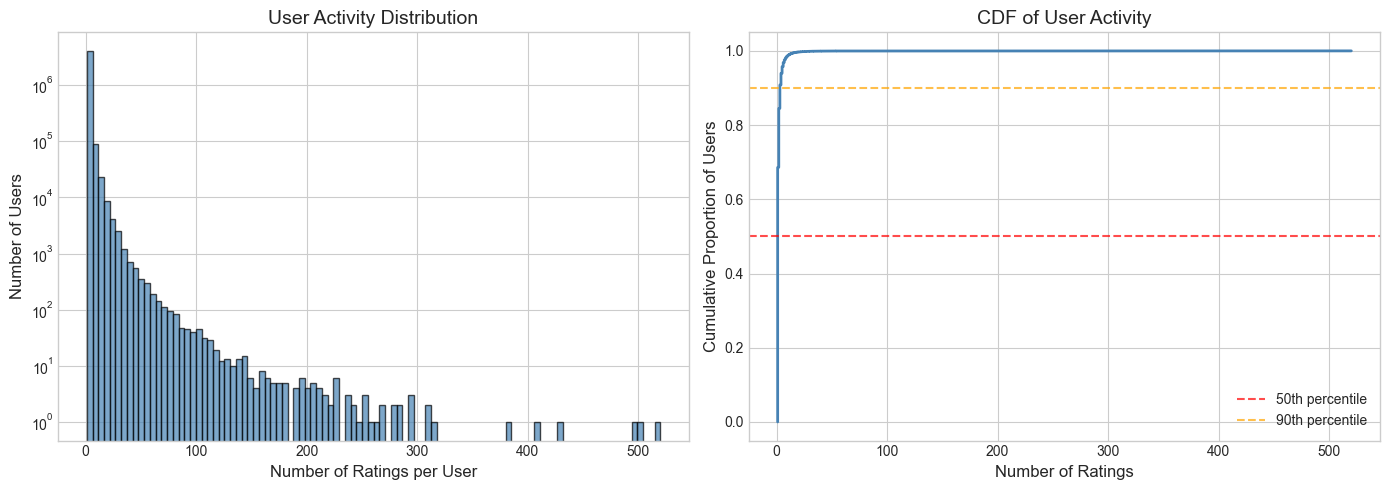

In [12]:
# User activity distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution (log scale)
axes[0].hist(user_activity, bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Ratings per User', fontsize=12)
axes[0].set_ylabel('Number of Users', fontsize=12)
axes[0].set_title('User Activity Distribution', fontsize=14)
axes[0].set_yscale('log')

# CDF
sorted_activity = np.sort(user_activity)
cdf = np.arange(1, len(sorted_activity) + 1) / len(sorted_activity)
axes[1].plot(sorted_activity, cdf, color='steelblue', linewidth=2)
axes[1].set_xlabel('Number of Ratings', fontsize=12)
axes[1].set_ylabel('Cumulative Proportion of Users', fontsize=12)
axes[1].set_title('CDF of User Activity', fontsize=14)
axes[1].axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='50th percentile')
axes[1].axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90th percentile')
axes[1].legend()

plt.tight_layout()
plt.savefig('user_activity.png', dpi=150, bbox_inches='tight')
plt.show()

In [13]:
# User segments
print("\n" + "=" * 50)
print("USER SEGMENTS")
print("=" * 50)

segments = [
    ('1 rating (one-time)', user_activity == 1),
    ('2-5 ratings', (user_activity >= 2) & (user_activity <= 5)),
    ('6-10 ratings', (user_activity >= 6) & (user_activity <= 10)),
    ('11-50 ratings', (user_activity >= 11) & (user_activity <= 50)),
    ('50+ ratings (power users)', user_activity > 50)
]

for name, condition in segments:
    count = condition.sum()
    pct = count / len(user_activity) * 100
    print(f"  {name}: {count:,} users ({pct:.2f}%)")


USER SEGMENTS
  1 rating (one-time): 2,881,832 users (68.59%)
  2-5 ratings: 1,141,195 users (27.16%)
  6-10 ratings: 127,256 users (3.03%)
  11-50 ratings: 49,947 users (1.19%)
  50+ ratings (power users): 1,466 users (0.03%)


In [14]:
# Top 10 most active users
print("\nTop 10 Most Active Users:")
top_users = user_activity.nlargest(10)
for i, (user, count) in enumerate(top_users.items(), 1):
    print(f"  {i}. {user}: {count:,} ratings")


Top 10 Most Active Users:
  1. A5JLAU2ARJ0BO: 520 ratings
  2. ADLVFFE4VBT8: 501 ratings
  3. A3OXHLG6DIBRW8: 498 ratings
  4. A6FIAB28IS79: 431 ratings
  5. A680RUE1FDO8B: 406 ratings
  6. A1ODOGXEYECQQ8: 380 ratings
  7. A36K2N527TXXJN: 314 ratings
  8. A2AY4YUOX2N1BQ: 311 ratings
  9. AWPODHOB4GFWL: 308 ratings
  10. A25C2M3QF9G7OQ: 296 ratings


## 5. Product Popularity Analysis

In [15]:
# Ratings per product
product_popularity = df.groupby('product_id').size()

print("=" * 50)
print("PRODUCT POPULARITY STATISTICS")
print("=" * 50)
print(product_popularity.describe())
print(f"\nMedian Ratings per Product: {product_popularity.median():.0f}")

PRODUCT POPULARITY STATISTICS
count   476002.00
mean        16.44
std        112.70
min          1.00
25%          1.00
50%          2.00
75%          7.00
max      18244.00
dtype: float64

Median Ratings per Product: 2


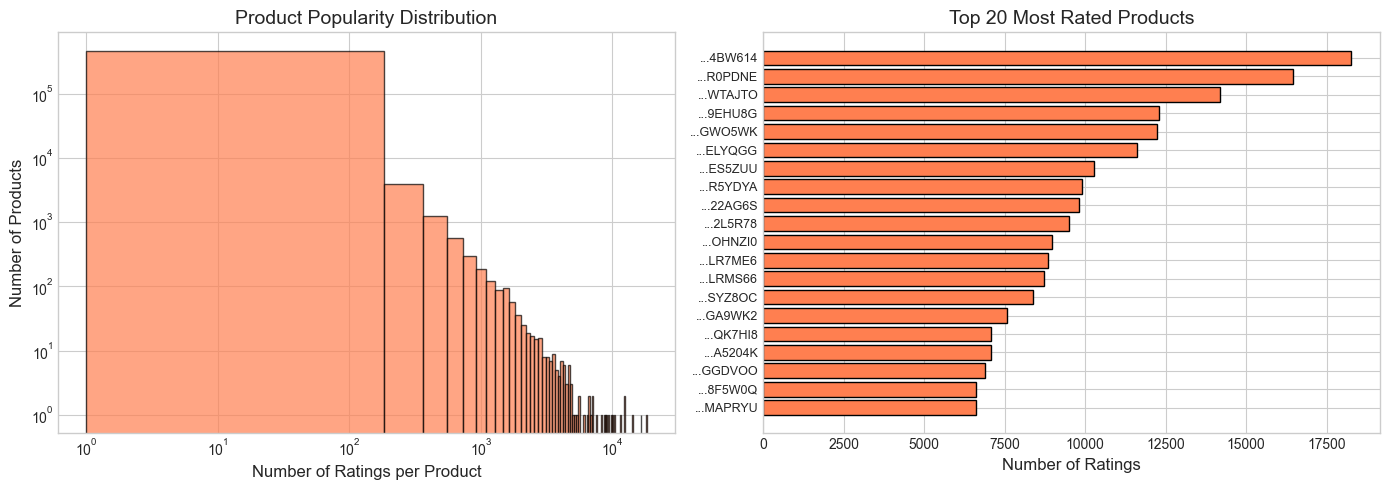

In [16]:
# Product popularity distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution (log-log scale to show power-law)
axes[0].hist(product_popularity, bins=100, color='coral', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Ratings per Product', fontsize=12)
axes[0].set_ylabel('Number of Products', fontsize=12)
axes[0].set_title('Product Popularity Distribution', fontsize=14)
axes[0].set_yscale('log')
axes[0].set_xscale('log')

# Top products bar chart
top_products = product_popularity.nlargest(20)
axes[1].barh(range(len(top_products)), top_products.values, color='coral', edgecolor='black')
axes[1].set_yticks(range(len(top_products)))
axes[1].set_yticklabels([f'...{pid[-6:]}' for pid in top_products.index], fontsize=9)
axes[1].set_xlabel('Number of Ratings', fontsize=12)
axes[1].set_title('Top 20 Most Rated Products', fontsize=14)
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('product_popularity.png', dpi=150, bbox_inches='tight')
plt.show()

In [17]:
# Product segments (long-tail analysis)
print("\n" + "=" * 50)
print("PRODUCT SEGMENTS (Long-Tail Analysis)")
print("=" * 50)

product_segments = [
    ('1 rating only', product_popularity == 1),
    ('2-5 ratings', (product_popularity >= 2) & (product_popularity <= 5)),
    ('6-20 ratings', (product_popularity >= 6) & (product_popularity <= 20)),
    ('21-100 ratings', (product_popularity >= 21) & (product_popularity <= 100)),
    ('100+ ratings (popular)', product_popularity > 100)
]

for name, condition in product_segments:
    count = condition.sum()
    pct = count / len(product_popularity) * 100
    print(f"  {name}: {count:,} products ({pct:.2f}%)")


PRODUCT SEGMENTS (Long-Tail Analysis)
  1 rating only: 179,738 products (37.76%)
  2-5 ratings: 157,088 products (33.00%)
  6-20 ratings: 83,612 products (17.57%)
  21-100 ratings: 42,487 products (8.93%)
  100+ ratings (popular): 13,077 products (2.75%)


In [18]:
# Average rating by product popularity
product_stats = df.groupby('product_id').agg({
    'rating': ['mean', 'count', 'std']
}).reset_index()
product_stats.columns = ['product_id', 'avg_rating', 'num_ratings', 'std_rating']

# Bin products by popularity
bins = [0, 1, 5, 20, 100, 500, float('inf')]
labels = ['1', '2-5', '6-20', '21-100', '101-500', '500+']
product_stats['popularity_bin'] = pd.cut(product_stats['num_ratings'], bins=bins, labels=labels)

avg_by_popularity = product_stats.groupby('popularity_bin', observed=True)['avg_rating'].mean()
print("\nAverage Rating by Product Popularity:")
for bin_name, avg in avg_by_popularity.items():
    print(f"  {bin_name} ratings: {avg:.3f}")


Average Rating by Product Popularity:
  1 ratings: 3.900
  2-5 ratings: 3.857
  6-20 ratings: 3.887
  21-100 ratings: 3.935
  101-500 ratings: 3.992
  500+ ratings: 4.108


## 6. Temporal Analysis

In [19]:
# Convert timestamp to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['year_month'] = df['datetime'].dt.to_period('M')
df['day_of_week'] = df['datetime'].dt.dayofweek

print("=" * 50)
print("TEMPORAL RANGE")
print("=" * 50)
print(f"Earliest Rating: {df['datetime'].min()}")
print(f"Latest Rating: {df['datetime'].max()}")
print(f"Time Span: {(df['datetime'].max() - df['datetime'].min()).days} days")

TEMPORAL RANGE
Earliest Rating: 1998-12-04 00:00:00
Latest Rating: 2014-07-23 00:00:00
Time Span: 5710 days


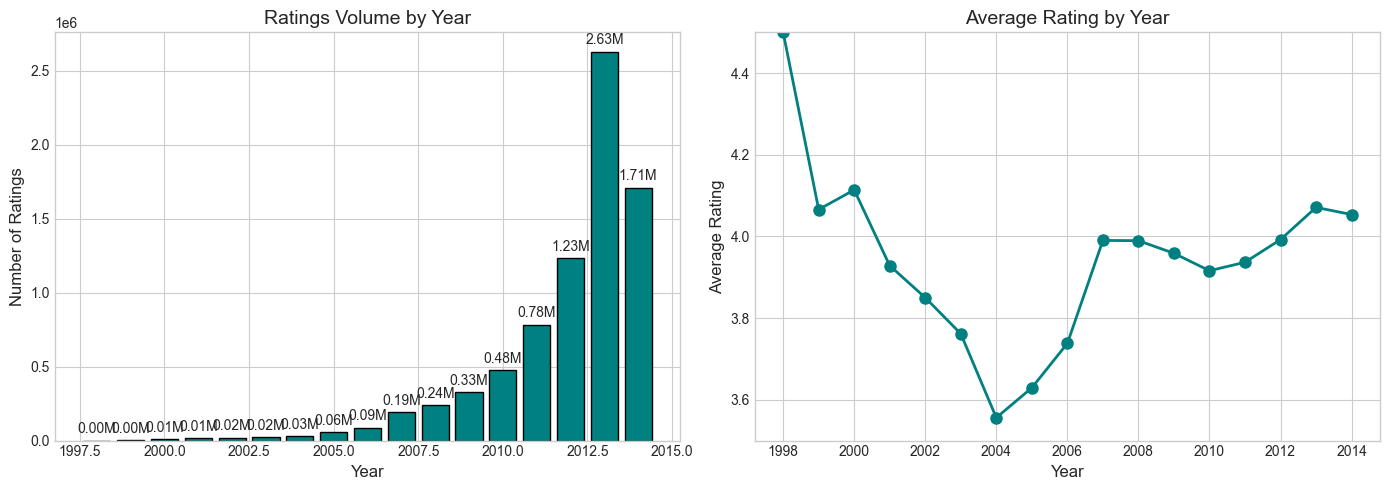

In [20]:
# Ratings by year
yearly_counts = df.groupby('year').size()
yearly_avg_rating = df.groupby('year')['rating'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ratings count by year
axes[0].bar(yearly_counts.index, yearly_counts.values, color='teal', edgecolor='black')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of Ratings', fontsize=12)
axes[0].set_title('Ratings Volume by Year', fontsize=14)
for i, (year, count) in enumerate(yearly_counts.items()):
    axes[0].text(year, count + 50000, f'{count/1e6:.2f}M', ha='center', fontsize=10)

# Average rating by year
axes[1].plot(yearly_avg_rating.index, yearly_avg_rating.values, marker='o', 
             linewidth=2, markersize=8, color='teal')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Average Rating', fontsize=12)
axes[1].set_title('Average Rating by Year', fontsize=14)
axes[1].set_ylim([3.5, 4.5])

plt.tight_layout()
plt.savefig('temporal_analysis_yearly.png', dpi=150, bbox_inches='tight')
plt.show()

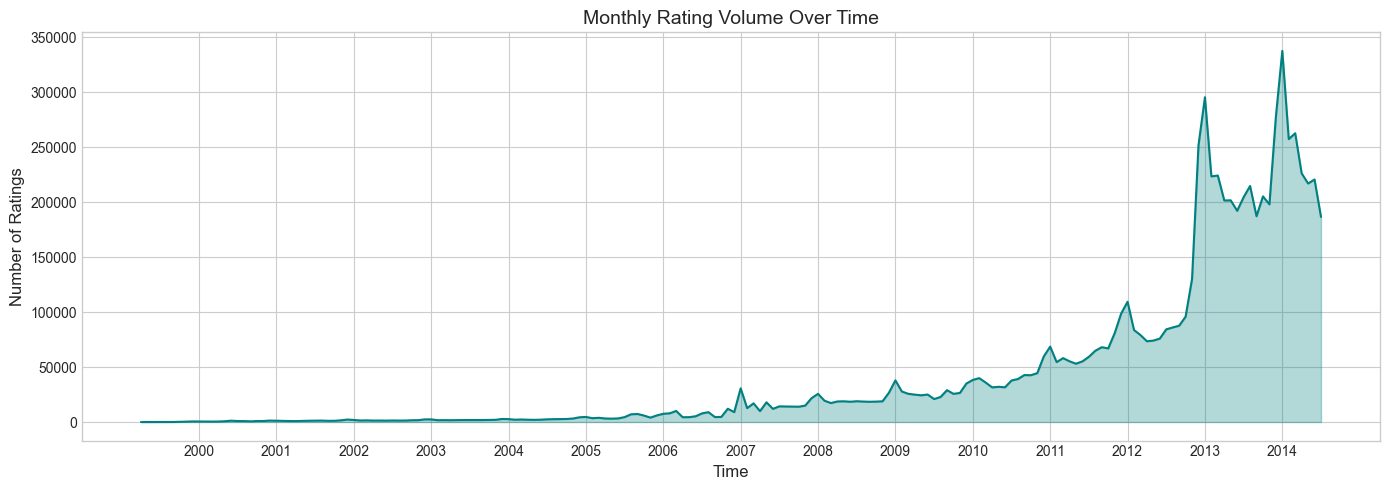

In [21]:
# Monthly trend
monthly_counts = df.groupby('year_month').size()

fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(range(len(monthly_counts)), monthly_counts.values, color='teal', linewidth=1.5)
ax.fill_between(range(len(monthly_counts)), monthly_counts.values, alpha=0.3, color='teal')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Number of Ratings', fontsize=12)
ax.set_title('Monthly Rating Volume Over Time', fontsize=14)

# Add year labels
tick_positions = []
tick_labels = []
for i, period in enumerate(monthly_counts.index):
    if period.month == 1:
        tick_positions.append(i)
        tick_labels.append(str(period.year))
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

plt.tight_layout()
plt.savefig('temporal_analysis_monthly.png', dpi=150, bbox_inches='tight')
plt.show()

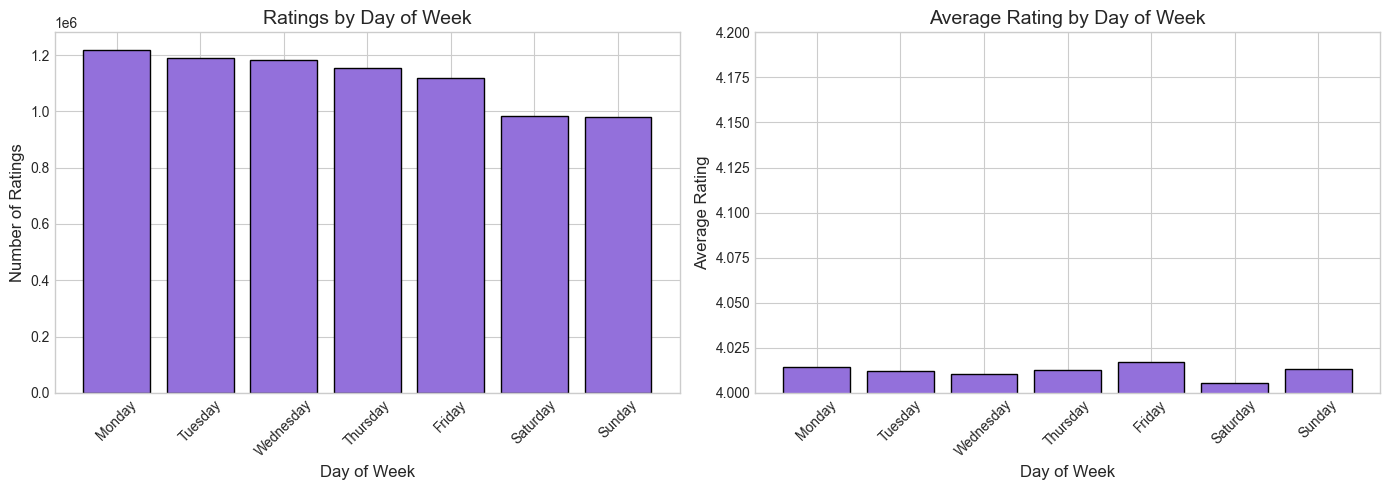

In [22]:
# Day of week analysis
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df.groupby('day_of_week').size()
dow_avg_rating = df.groupby('day_of_week')['rating'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(day_names, dow_counts.values, color='mediumpurple', edgecolor='black')
axes[0].set_xlabel('Day of Week', fontsize=12)
axes[0].set_ylabel('Number of Ratings', fontsize=12)
axes[0].set_title('Ratings by Day of Week', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(day_names, dow_avg_rating.values, color='mediumpurple', edgecolor='black')
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Average Rating', fontsize=12)
axes[1].set_title('Average Rating by Day of Week', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim([4.0, 4.2])

plt.tight_layout()
plt.savefig('temporal_analysis_dow.png', dpi=150, bbox_inches='tight')
plt.show()

## 7. User-Item Interaction Matrix Analysis

In [23]:
# Sparsity visualization (sample)
print("=" * 50)
print("INTERACTION MATRIX PROPERTIES")
print("=" * 50)

total_possible = n_users * n_products
actual_interactions = n_ratings

print(f"Matrix Dimensions: {n_users:,} users x {n_products:,} products")
print(f"Total Possible Interactions: {total_possible:,}")
print(f"Actual Interactions: {actual_interactions:,}")
print(f"Sparsity: {(1 - actual_interactions/total_possible)*100:.4f}%")
print(f"Density: {(actual_interactions/total_possible)*100:.6f}%")

INTERACTION MATRIX PROPERTIES
Matrix Dimensions: 4,201,696 users x 476,002 products
Total Possible Interactions: 2,000,015,699,392
Actual Interactions: 7,824,482
Sparsity: 99.9996%
Density: 0.000391%


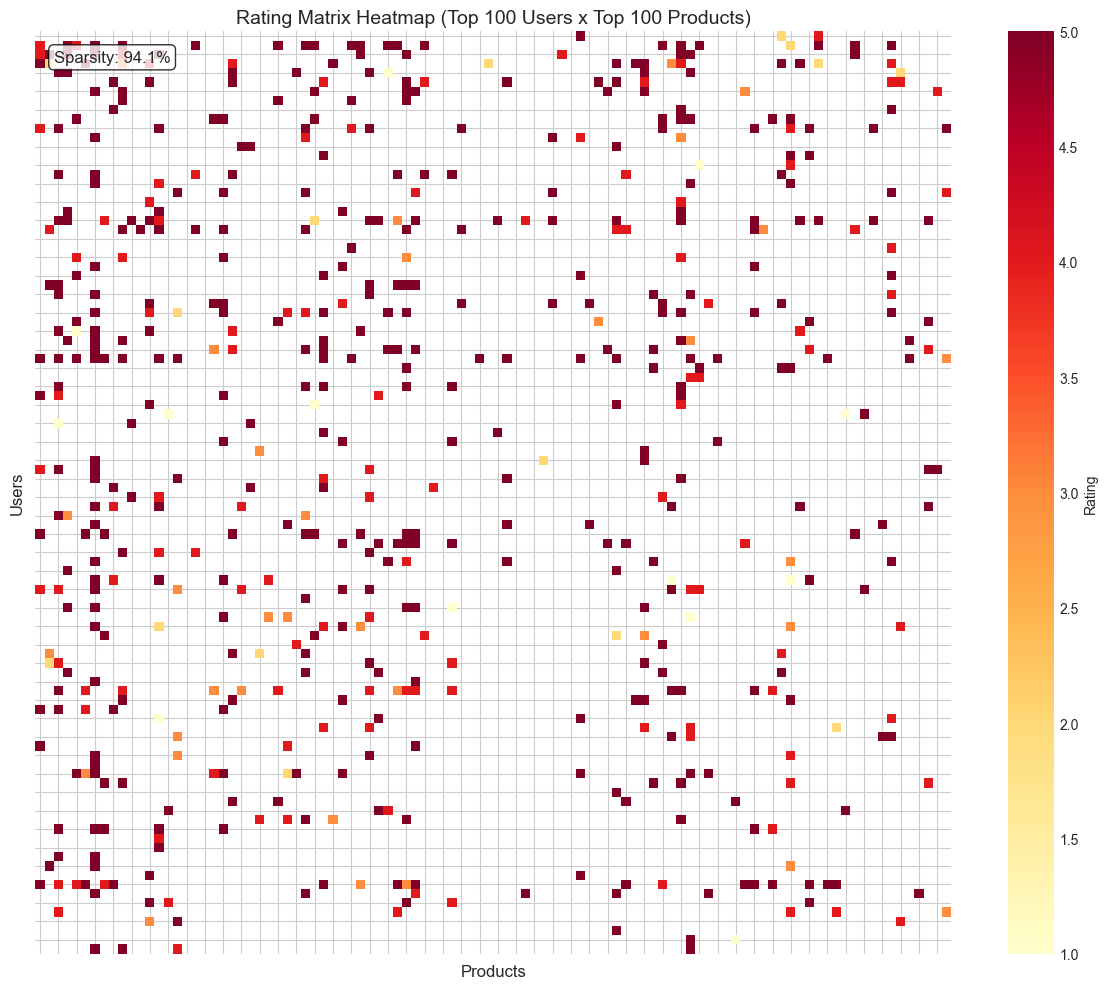

In [24]:
# Sample matrix visualization (top users and products)
top_n_users = 100
top_n_products = 100

top_user_ids = user_activity.nlargest(top_n_users).index.tolist()
top_product_ids = product_popularity.nlargest(top_n_products).index.tolist()

# Filter data
sample_df = df[df['user_id'].isin(top_user_ids) & df['product_id'].isin(top_product_ids)]

# Create pivot table
sample_matrix = sample_df.pivot_table(index='user_id', columns='product_id', 
                                       values='rating', aggfunc='first')
sample_matrix = sample_matrix.reindex(index=top_user_ids, columns=top_product_ids)

# Visualize
fig, ax = plt.subplots(figsize=(12, 10))
mask = sample_matrix.isnull()
sns.heatmap(sample_matrix.fillna(0), cmap='YlOrRd', mask=mask, 
            cbar_kws={'label': 'Rating'}, ax=ax)
ax.set_title(f'Rating Matrix Heatmap (Top {top_n_users} Users x Top {top_n_products} Products)', fontsize=14)
ax.set_xlabel('Products', fontsize=12)
ax.set_ylabel('Users', fontsize=12)
ax.set_xticklabels([])
ax.set_yticklabels([])

sample_sparsity = mask.sum().sum() / (top_n_users * top_n_products) * 100
ax.text(0.02, 0.98, f'Sparsity: {sample_sparsity:.1f}%', transform=ax.transAxes,
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('interaction_matrix_sample.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Cold Start Analysis

In [25]:
# Cold start users (users with very few ratings)
print("=" * 50)
print("COLD START ANALYSIS")
print("=" * 50)

cold_thresholds = [1, 2, 3, 5, 10]

print("\nCold Start Users (users with <= N ratings):")
for threshold in cold_thresholds:
    cold_users = (user_activity <= threshold).sum()
    pct = cold_users / n_users * 100
    print(f"  <= {threshold} ratings: {cold_users:,} users ({pct:.2f}%)")

print("\nCold Start Products (products with <= N ratings):")
for threshold in cold_thresholds:
    cold_products = (product_popularity <= threshold).sum()
    pct = cold_products / n_products * 100
    print(f"  <= {threshold} ratings: {cold_products:,} products ({pct:.2f}%)")

COLD START ANALYSIS

Cold Start Users (users with <= N ratings):
  <= 1 ratings: 2,881,832 users (68.59%)
  <= 2 ratings: 3,550,016 users (84.49%)
  <= 3 ratings: 3,815,326 users (90.80%)
  <= 5 ratings: 4,023,027 users (95.75%)
  <= 10 ratings: 4,150,283 users (98.78%)

Cold Start Products (products with <= N ratings):
  <= 1 ratings: 179,738 products (37.76%)
  <= 2 ratings: 251,918 products (52.92%)
  <= 3 ratings: 292,320 products (61.41%)
  <= 5 ratings: 336,826 products (70.76%)
  <= 10 ratings: 385,105 products (80.90%)


## 9. Summary & Recommendations for Modeling

In [26]:
print("="*70)
print("SUMMARY REPORT")
print("="*70)

print(f"""
DATASET OVERVIEW:
  - Total Ratings: {n_ratings:,}
  - Unique Users: {n_users:,}
  - Unique Products: {n_products:,}
  - Time Period: {df['datetime'].min().strftime('%Y-%m-%d')} to {df['datetime'].max().strftime('%Y-%m-%d')}
  
RATING CHARACTERISTICS:
  - Mean Rating: {df['rating'].mean():.3f}
  - Rating Std: {df['rating'].std():.3f}
  - Most Common Rating: {df['rating'].mode().values[0]}
  - Positive Bias: {(df['rating'] >= 4).sum() / len(df) * 100:.1f}% ratings are 4 or 5 stars
  
DATA QUALITY:
  - Missing Values: {df.isnull().sum().sum()}
  - Duplicates: {df.duplicated().sum():,}
  
SPARSITY:
  - Matrix Density: {(n_ratings / (n_users * n_products)) * 100:.6f}%
  - Sparsity: {(1 - n_ratings / (n_users * n_products)) * 100:.4f}%
  
COLD START CHALLENGE:
  - Users with only 1 rating: {(user_activity == 1).sum():,} ({(user_activity == 1).sum()/n_users*100:.1f}%)
  - Products with only 1 rating: {(product_popularity == 1).sum():,} ({(product_popularity == 1).sum()/n_products*100:.1f}%)
""")

print("\nMODELING RECOMMENDATIONS:")
print("-" * 50)
print("""
1. COLLABORATIVE FILTERING:
   - Matrix Factorization (SVD, ALS) suitable for this sparse data
   - Consider implicit feedback approaches
   
2. DATA PREPROCESSING:
   - Filter users/items with minimum interactions (e.g., >=5)
   - Handle rating bias (global, user, item biases)
   - Time-based train/test split recommended
   
3. COLD START MITIGATION:
   - High cold-start rate requires fallback strategies
   - Consider popularity-based recommendations for new users/items
   
4. EVALUATION:
   - Use RMSE, MAE for rating prediction
   - Use Precision@K, Recall@K, NDCG for ranking
   - Time-based or user-based cross-validation
""")

SUMMARY REPORT

DATASET OVERVIEW:
  - Total Ratings: 7,824,482
  - Unique Users: 4,201,696
  - Unique Products: 476,002
  - Time Period: 1998-12-04 to 2014-07-23

RATING CHARACTERISTICS:
  - Mean Rating: 4.012
  - Rating Std: 1.381
  - Most Common Rating: 5.0
  - Positive Bias: 74.6% ratings are 4 or 5 stars

DATA QUALITY:
  - Missing Values: 0
  - Duplicates: 0

SPARSITY:
  - Matrix Density: 0.000391%
  - Sparsity: 99.9996%

COLD START CHALLENGE:
  - Users with only 1 rating: 2,881,832 (68.6%)
  - Products with only 1 rating: 179,738 (37.8%)


MODELING RECOMMENDATIONS:
--------------------------------------------------

1. COLLABORATIVE FILTERING:
   - Matrix Factorization (SVD, ALS) suitable for this sparse data
   - Consider implicit feedback approaches

2. DATA PREPROCESSING:
   - Filter users/items with minimum interactions (e.g., >=5)
   - Handle rating bias (global, user, item biases)
   - Time-based train/test split recommended

3. COLD START MITIGATION:
   - High cold-start ra

In [27]:
# Clean up temporary columns
df_clean = df.drop(columns=['datetime', 'year', 'month', 'year_month', 'day_of_week'])
print("EDA Complete! Data ready for modeling.")
print(f"\nFinal dataset shape: {df_clean.shape}")

EDA Complete! Data ready for modeling.

Final dataset shape: (7824482, 4)
